In [3]:
pip install matplotlib seaborn


<ipython-input-7-bfbb706e6340>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime_df['Type'].fillna('Unknown', inplace=True)
<ipython-input-7-bfbb706e6340>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated_anime, x='Rating', y='Name', palette='viridis')


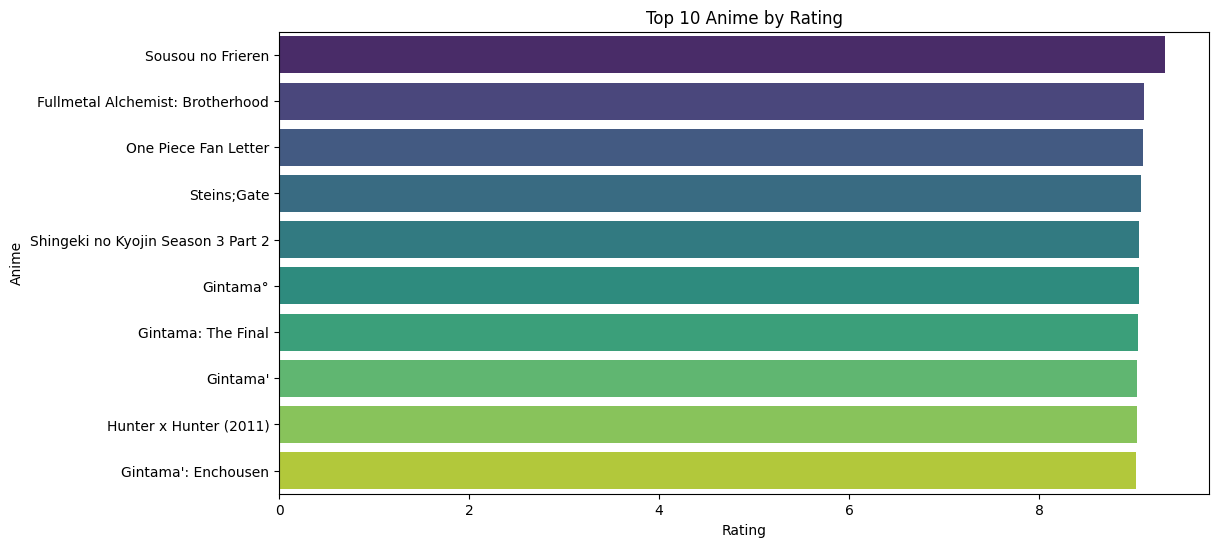

<ipython-input-7-bfbb706e6340>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_popular_anime, x='Members', y='Name', palette='coolwarm')


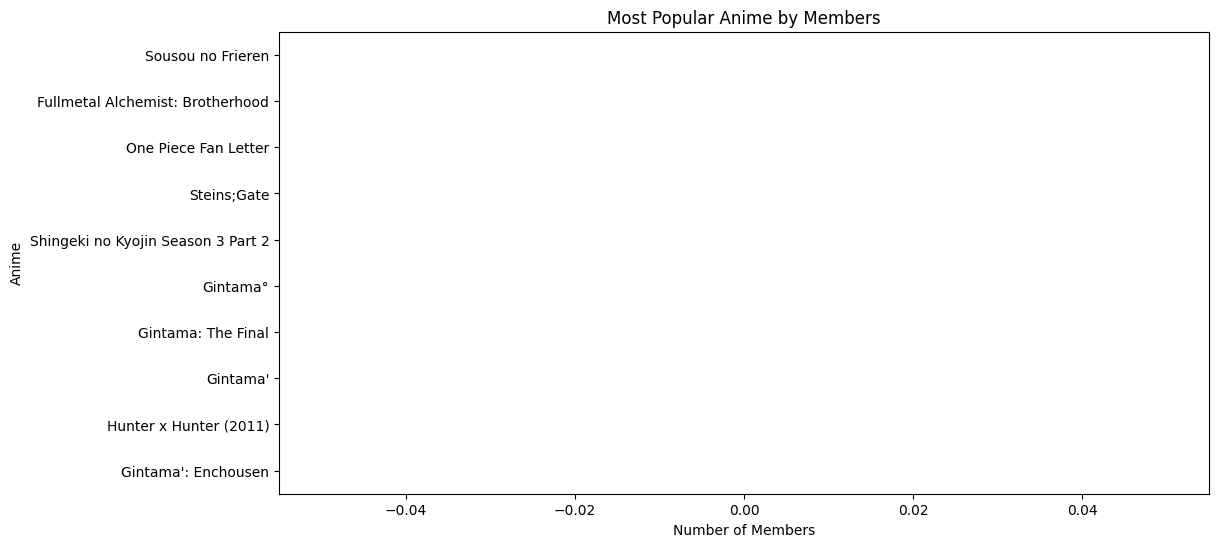

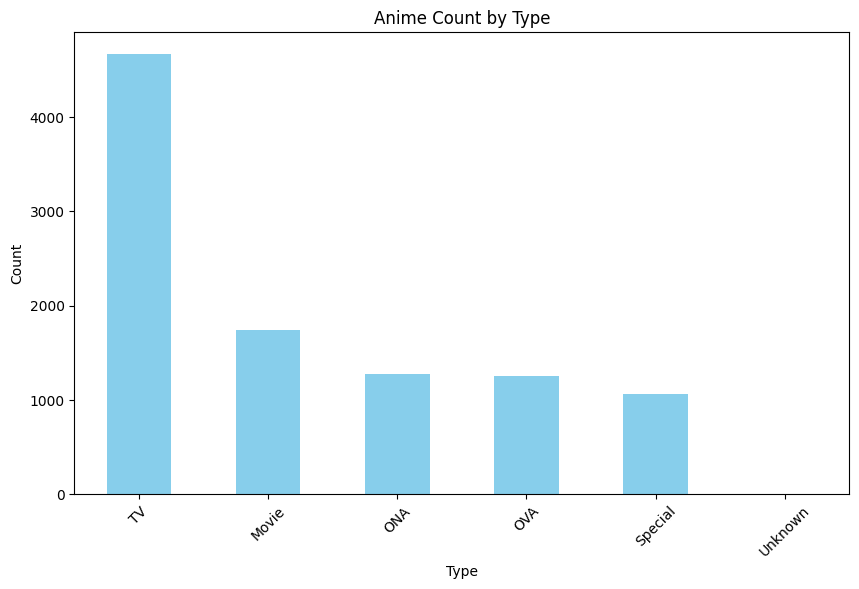

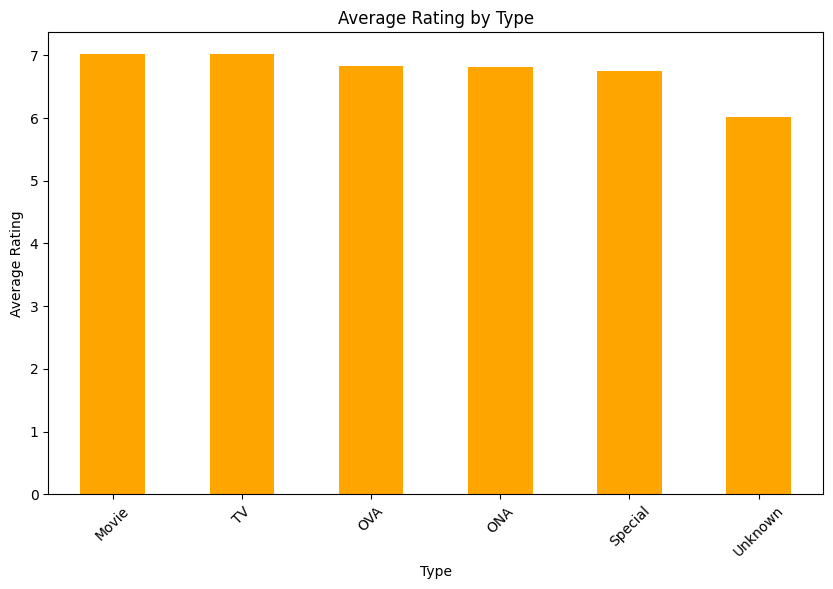


Cleaned dataset saved to /content/cleaned_anime_dataset.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/content/top_anime_dataset.csv'
anime_df = pd.read_csv(data_path)

# Handle potential column naming issues (strip whitespace, check names)
anime_df.columns = anime_df.columns.str.strip()

# Clean the 'Members' column
def clean_members(member_str):
    try:
        if pd.isna(member_str) or not isinstance(member_str, str):
            return 0  # Replace NaN or invalid data with 0
        return int(member_str.replace(',', '').replace(' members', '').strip())
    except ValueError:
        return 0  # Handle unexpected formatting

if 'Members' in anime_df.columns:
    anime_df['Members'] = anime_df['Members'].apply(clean_members)

# Fill missing values for 'Type' and 'Rating'
anime_df['Type'].fillna('Unknown', inplace=True)
anime_df['Rating'] = pd.to_numeric(anime_df['Rating'], errors='coerce').fillna(0)

# Save Plot 1: Top 10 Anime by Rating
plt.figure(figsize=(12, 6))
sns.barplot(data=top_rated_anime, x='Rating', y='Name', palette='viridis')
plt.title('Top 10 Anime by Rating')
plt.xlabel('Rating')
plt.ylabel('Anime')
plt.savefig("top_rated_anime.png")  # Save the plot as an image
plt.show()

# Save Plot 2: Most Popular Anime by Members
plt.figure(figsize=(12, 6))
sns.barplot(data=most_popular_anime, x='Members', y='Name', palette='coolwarm')
plt.title('Most Popular Anime by Members')
plt.xlabel('Number of Members')
plt.ylabel('Anime')
plt.savefig("most_popular_anime.png")  # Save the plot as an image
plt.show()

# Save Plot 3: Anime Count by Type
plt.figure(figsize=(10, 6))
anime_by_type.plot(kind='bar', color='skyblue')
plt.title('Anime Count by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig("anime_count_by_type.png")  # Save the plot as an image
plt.show()

# Save Plot 4: Average Rating by Type
plt.figure(figsize=(10, 6))
avg_rating_by_type.plot(kind='bar', color='orange')
plt.title('Average Rating by Type')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.savefig("avg_rating_by_type.png")  # Save the plot as an image
plt.show()


# Save cleaned data
output_path = '/content/cleaned_anime_dataset.csv'
anime_df.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to {output_path}")


In [6]:
from google.colab import files

# Download the image file
files.download("top_rated_anime.png")  # Change the filename as needed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>